### Visualize random samples

Don't forget to update all paths

In [2]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [3]:
dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_train_val.json", "r"))

print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
print(Counter([dataset[k]['Qcate'] for k in dataset]))


Counter({'train': 36766, 'val': 4966})
41732
Counter({'text': 20267, 'YesNo': 7320, 'Others': 5412, 'choose': 4220, 'number': 2118, 'color': 1830, 'shape': 565})


In [4]:
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

345150


In [5]:
### Txt-based queries
show_distractors = False

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] == 'text': break

print(k)
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

d5d5324e0dba11ecb1e81171463288e9
Q =  In the portion of the cavity of the larynx above the vestibular fold, it is an opening of what wall of the larynx?

A =
['The lateral wall.']

------ Positive Evidence ------ 
The vestibule is an opening in the lateral wall of the larynx, between the vestibular fold above and the vocal folds below. It is the inlet to another cavity in the lateral wall of larynx, the laryngeal ventricle.
https://en.wikipedia.org/wiki/Laryngeal_vestibule
The portion of the cavity of the larynx above the vestibular fold is called the laryngeal vestibule; it is wide and triangular in shape, its base or anterior wall presenting, however, about its center the backward projection of the tubercle of the epiglottis.
https://en.wikipedia.org/wiki/Laryngeal_vestibule


d5cdec640dba11ecb1e81171463288e9
Q =  "In what position is the female in "Arcadian Landscape"?"

A =
['"The female in "Arcadian Landscape" is laying down."']

------ Positive Evidence ------ 
30168530 30168530
https://commons.wikimedia.org/wiki/File:Arcadian_Landscape%2C_by_the_circle_of_Nicolas_Poussin%2C_c._1627-1628%2C_oil_on_canvas_-_Blanton_Museum_of_Art_-_Austin%2C_Texas_-_DSC07880.jpg
Caption =  Arcadian Landscape, by the circle of Nicolas Poussin, c. 1627-1628, oil on canvas - Blanton Museum of Art - Austin, Texas - DSC07880 Arcadian Landscape


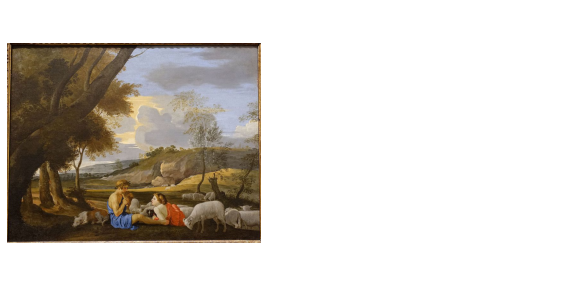

In [13]:
### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] in Qcate:
        break
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
    ax.imshow(im[:,:,::-1])
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])